In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_car = pd.read_csv('car data.csv')

In [3]:
df_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df_car.shape

(301, 9)

In [5]:
print(df_car['Seller_Type'].unique())
print(df_car['Transmission'].unique())
print(df_car['Fuel_Type'].unique())
print(df_car['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [6]:
#check missing or null values
df_car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df_car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df_car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
final_cardf = df_car[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [10]:
final_cardf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
final_cardf['Current_year']=2022

In [12]:
final_cardf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [13]:
final_cardf['numberof_year'] = final_cardf['Current_year']- final_cardf['Year']

In [14]:
final_cardf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,numberof_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [15]:
final_cardf.drop(['Year','Current_year'], axis =1 , inplace = True)

In [16]:
final_cardf.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,numberof_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [17]:
final_cardf = pd.get_dummies(final_cardf, drop_first=True)

In [18]:
final_cardf.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,numberof_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [19]:
final_cardf.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,numberof_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
numberof_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


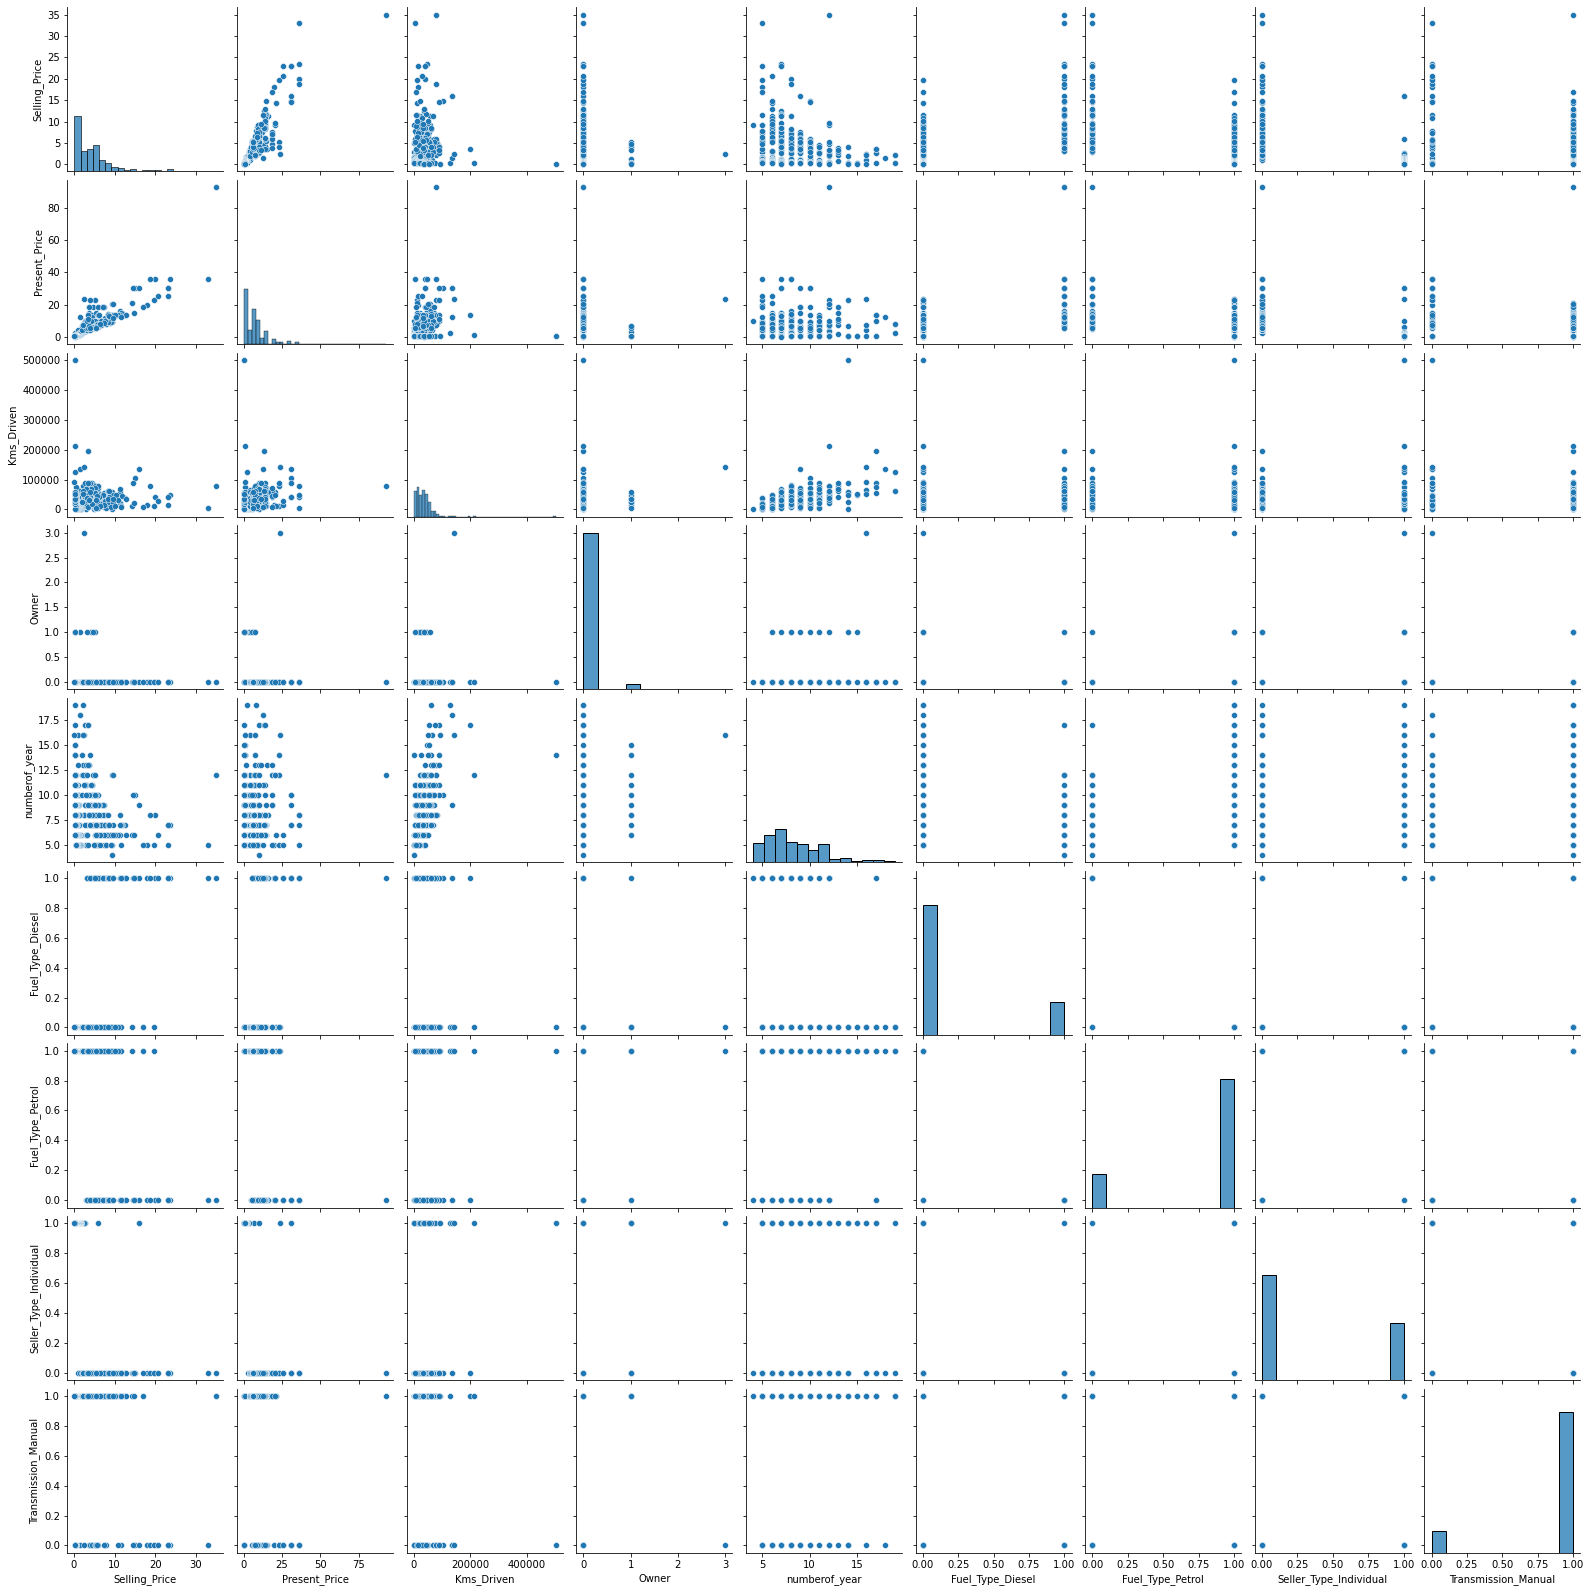

In [20]:
sns.pairplot(final_cardf)

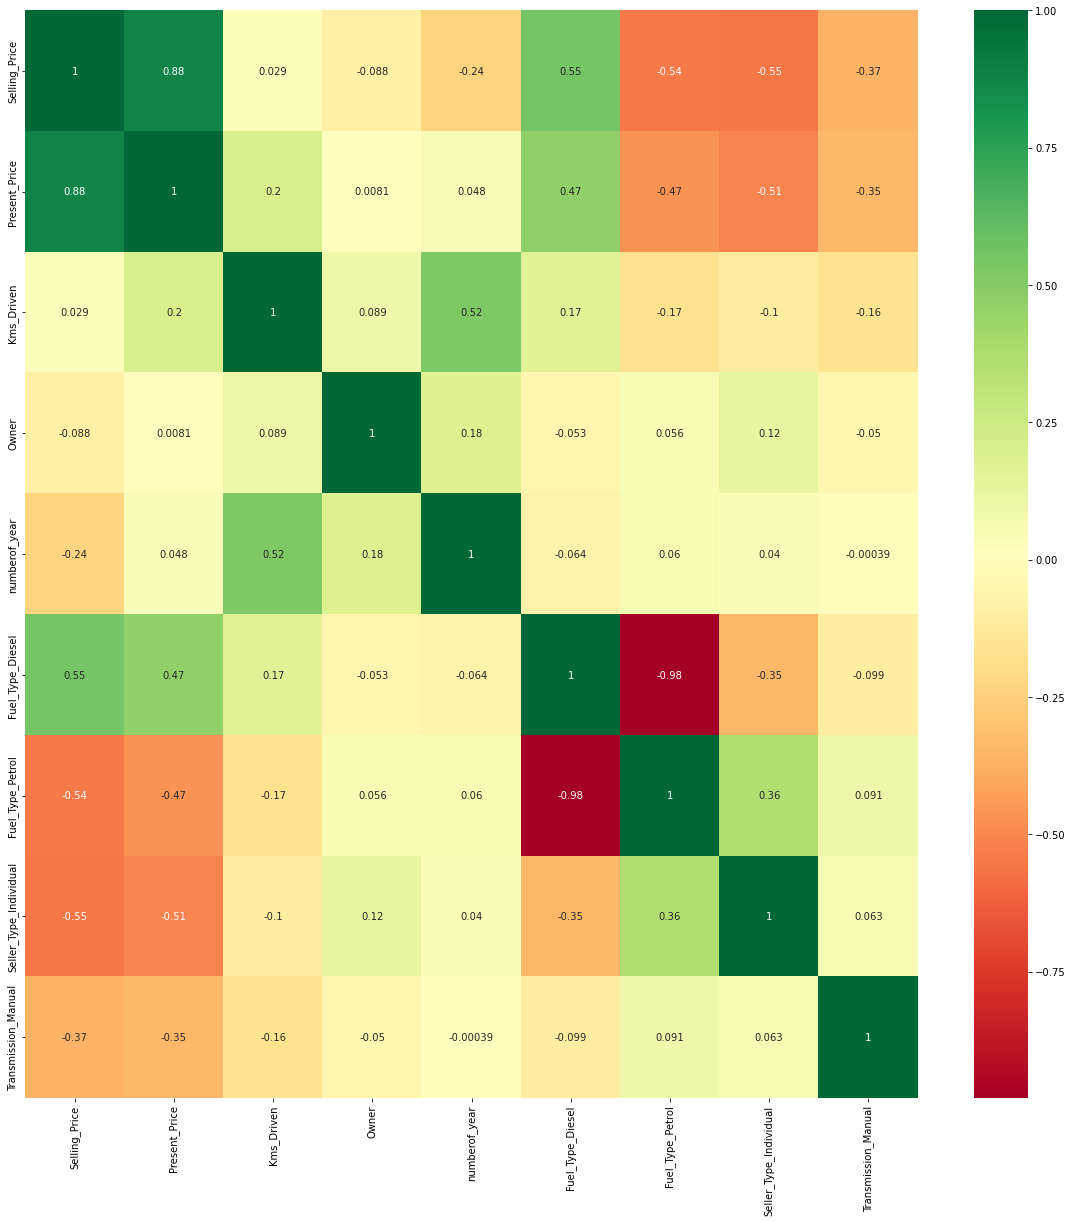

In [21]:
carmap = final_cardf.corr()
top_corr_features = carmap.index
plt.figure(figsize = (20,20))
heatmap = sns.heatmap(final_cardf[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [22]:
#independent and dependent features
X= final_cardf.iloc[:,1:]
y = final_cardf.iloc[:,0]

In [23]:
X.head()

,Present_Price,Kms_Driven,Owner,numberof_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [24]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [25]:
#Feature importance
model =ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.35866087 0.04143259 0.00081601 0.07668446 0.24219271 0.00736759
 0.13679208 0.13605368]


<function matplotlib.pyplot.show(*args, **kw)>

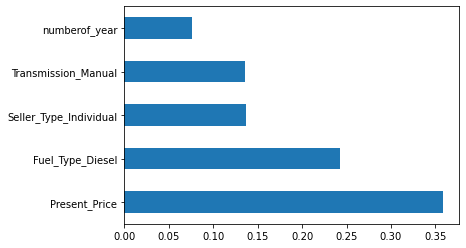

In [27]:
feat_importance = pd.Series(model.feature_importances_, index = X.columns)
feat_importance.nlargest(5).plot(kind = 'barh')
plt.show

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state =40)

In [29]:
X_train.shape

(210, 8)

In [32]:
##Hyperparameters
n_estimators= [int(x) for x in np.linspace(start = 100, stop =1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [33]:
##Random Search Cv

In [34]:
# number of tree in random forest
n_estimators= [int(x) for x in np.linspace(start = 100, stop =1200, num = 12)]

# number of features to consider at every split
max_features = ['auto','sqrt']

#maximun number of levels of tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]

#minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

#minimum number of samples required at each leaf  node
min_samples_leaf = [1, 2, 5, 10]

In [36]:
#create a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
                'max_depth': max_depth,
                 'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [37]:
#use random grid to find for  best hyperparameters
#first create the base model
random_forest = RandomForestRegressor()

In [38]:
rf_randomcv = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, scoring ='neg_mean_squared_error', n_iter = 10, cv =5, verbose =2, random_state =42, n_jobs =1)

In [39]:
rf_randomcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
predictions = rf_randomcv.predict(X_test)

In [41]:
predictions

array([ 4.4965   ,  1.23904  ,  9.55149  ,  5.13617  ,  9.76988  ,
        7.49811  ,  5.62375  ,  0.42396  ,  0.29655  ,  5.00783  ,
        8.70607  ,  5.77035  ,  0.55168  ,  1.09716  ,  8.09314  ,
        1.07293  ,  0.57397  ,  5.4190625,  0.478    ,  7.17365  ,
        4.8564625,  2.67867  ,  2.7811725,  0.71322  ,  1.43976  ,
        0.82296  ,  5.14658  ,  0.65512  ,  4.16225  ,  4.5006125,
        5.55798  ,  3.67949  ,  0.58288  ,  7.80685  ,  2.74149  ,
        5.27111  ,  0.80594  ,  3.78035  ,  0.71535  ,  0.70533  ,
        0.63333  ,  2.55431  , 11.54735  ,  6.6243   ,  4.00074  ,
       21.40916  ,  8.64187  ,  0.81517  ,  3.15921  ,  0.72565  ,
        1.33407  ,  7.66015  ,  1.14614  ,  0.70099  ,  2.85247  ,
        6.81605  ,  0.28718  ,  0.5003   ,  0.49081  ,  0.80401  ,
        0.61187  , 11.34512  ,  0.7298   ,  8.12778  ,  7.4422   ,
        2.34465  ,  4.14162  ,  5.85491  ,  0.57918  ,  2.62309  ,
        8.71648  ,  5.8201   ,  4.67201  ,  0.42232  ,  2.4142

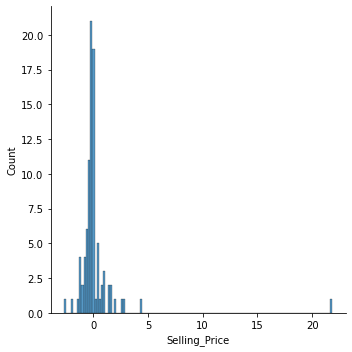

In [42]:
sns.displot(y_test-predictions)

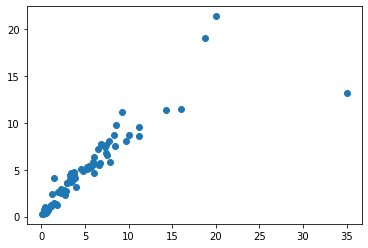

In [43]:
plt.scatter(y_test, predictions)

In [44]:
import pickle
#open a file where you want to store the data 
file = open('random_forest_regression_carprice_model.pkl','wb')

#dump information to that file
pickle.dump(rf_randomcv,file)